# Tarea 4


## Caracteristicas

### Limones

1. distancia al centroide de cada punto no varia mucho con respecto a la distancia promedio de todos los pixeles al centroide
2. circular/ovalado
3. diametro 1 circulo hough > x numero definido por el diametro de la arandela, es decir mucho mayor al diametro de la arandela
4. gran cantidad de pixeles

### Arandelas

1. circular
2. centro con pocos pixeles
3. pocos pixeles
4. l y h muy pequeños
5. centroide es de un valor diferente de los pixeles del objeto

### Clavos

1. largos
2. brillantes
3. cabeza larga
4. distancia al centroide de varios puntos varia mucho con respecto a la distancia promedio de todos los pixeles al centroide
5. delgados

### Expander

1. largo, menos largo que un clavo
2. delgado, mas ancho que el clavo
3. puede tener patitas
4. 


### Prensa

1. similar en largo que expander, menos que clavo
2. simitria a lo largo
3. corte transversal una mitad mas ancha que la otra
4. 

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import gaussian, sobel
from skimage.filters import threshold_otsu

from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk  # noqa

from skimage import feature

from sklearn.utils import shuffle
from sklearn.cluster import KMeans


In [3]:

#Obtener la direccion de las imagenes
path = os.getcwd()

#Mostrar la Imagen original NS01_b
img_org= io.imread(path +r'\CLASS-79.png',True)


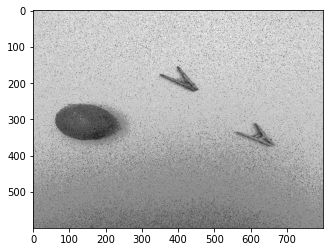

In [20]:
#quantificacion

def quant(img,n):
    w,h= img.shape
    out_img = np.zeros(img.shape, dtype=np.uint8)
    for k in range(n):
        li = 255*k/n
        ls = 255*(k+1)/n
        #print(li)
        #print(ls)
        for i in range(w):
            for j in range(h):
                if li < img[i][j] < ls:
                    out_img[i][j] = (li+ls)/2
    return out_img

img_quant = quant(img_org,5)
plt.imshow(img_quant, cmap='gray')
plt.show()

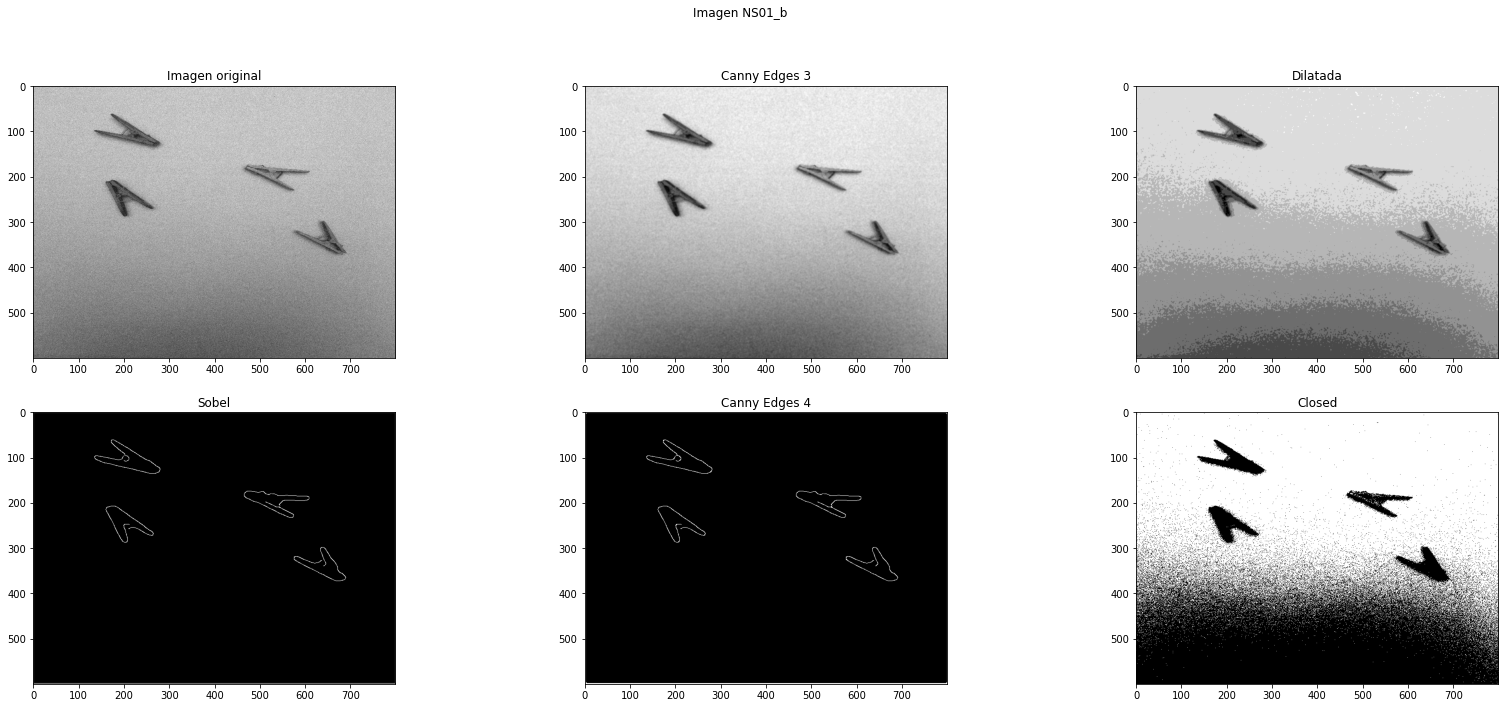

In [42]:
img_org= io.imread(path +r'\CLASS-43.png',True)

#Sobel
#sobel = sobel(img_org)
edges1 = feature.canny(img_org,sigma=3)
edges2 = feature.canny(img_org,sigma=1)

#Filtro Gaussiano
img_org_filtrada = gaussian(img_org, sigma=1)*255
img_org_filtrada1 = gaussian(img_org, sigma=2)
img_org_filtrada2 = gaussian(img_org, sigma=3)
img_org_filtrada3 = gaussian(img_org, sigma=4)
#Otsu
thresh = threshold_otsu(img_org)
binary = img_org > thresh

img_quant = quant(img_org_filtrada,10)

edges3 = feature.canny(img_quant,sigma=3.5)

#Erosion y dilatacion
footprint = disk(4.4)
eroded = erosion(img_org, footprint)
footprint = disk(2)
dilated = dilation(edges1, footprint)
footprint = disk(2)
closed = closing(edges3, footprint)


fig2, axs = plt.subplots(2,3,figsize=(28,11))
fig2.suptitle('Imagen NS01_b')
axs[0,0].imshow(img_org,cmap='gray')
axs[0,0].set_title('Imagen original')

axs[0,1].imshow(img_org_filtrada,cmap='gray')
axs[0,1].set_title('Canny Edges 3')

axs[0,2].imshow(img_quant,cmap='gray')
axs[0,2].set_title('Dilatada')

axs[1,0].imshow(edges3,cmap='gray')
axs[1,0].set_title('Sobel')

axs[1,1].imshow(closed,cmap='gray')
axs[1,1].set_title('Canny Edges 4')

axs[1,2].imshow(binary,cmap='gray')
axs[1,2].set_title('Closed')

plt.show()